### Steps:
<ul>
    <li>Quality control
    <li>Trim flank sequences
    <li>Count unique insertion sequences
    <li>Collapse on 1/2-Hamming distances
    <li>Translate DNA --> amino acids
    <li>Compute:<ul>
                    <li>Frequency
                    <li>Average frequency
                    <li>Enrichment Score
                    <li>Heatmap
</ul>

2 tool suggestions:
- UMItools (CLI tool) - clustering algorithm
- cutadapt 

In the large fastq library file, I'm only pulling the sequences that I've already found in the tissue files


## Quality control (skipped for now)

## Trim Flank Sequences
Trimming of invariable sequence flanking the insertion sequence allowing a 10% error rate (currently allowing 0% error rate--we'll work on this later)

In [111]:
import gzip
from mimetypes import guess_type
from functools import partial
from Bio import SeqIO

In [112]:
input_file = '/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA/1153-cDNA-8V8_S30_L001_R1_001.fastq.gz'

encoding = guess_type(input_file)[1]  # uses file extension
_open = partial(gzip.open, mode='rt') if encoding == 'gzip' else open

read_count = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        read_count += 1

print(read_count)

173019


In [113]:
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        print(record)
        print(record.seq)
        break

ID: M06176:70:000000000-JW4VC:1:1101:8803:1076
Name: M06176:70:000000000-JW4VC:1:1101:8803:1076
Description: M06176:70:000000000-JW4VC:1:1101:8803:1076 1:N:0:NCGGTCCAAC+NCTTACATCA
Number of features: 0
Per letter annotation for: phred_quality
Seq('TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCA...CGG')
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCAAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG


In [114]:
Left_flank = 'taacttgcagcagcaaGGC' 
Right_flank = 'GCCaacacggctcctcaaa'

Left_flank = Left_flank.upper()
Right_flank = Right_flank.upper()
print(Left_flank, Right_flank)

TAACTTGCAGCAGCAAGGC GCCAACACGGCTCCTCAAA


In [115]:
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        print(record.seq)
        if Left_flank in record.seq:
            index = record.seq.find(Left_flank)
            print('Left_flank in record.seq at index : ', str(index))
            left_flank_loc = record.seq[:index] + ' left flank start --> ' + record.seq[index:index + len(Left_flank)] + ' <-- left flank end ' + record.seq[index + len(Left_flank):]
            print(left_flank_loc)
        if Right_flank in record.seq:
            index = record.seq.find(Right_flank)
            print('Right_flank in record.seq at index : ', str(index))
            Right_flank_loc = record.seq[:index] + ' right flank start --> ' + record.seq[index:index + len(Right_flank)] + ' <-- right flank end ' + record.seq[index + len(Right_flank):]
            print(Right_flank_loc)
            break

TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCAAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
Left_flank in record.seq at index :  39
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end AAATCTGNTNGTNNTACTCTGNNNNNCNCGGCTCCTNAAANTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCGTGCCAACACGGNTNCTNNAATTGGANNNNNCNACAGCCAGNGGGNCTTACCCGNNATGGTCTGGCAGAACCGGGACGTGTACCT
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCTCTGAAANGCCGANTGGTTTCNNNAACACGGCTCCTNAAATTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
Left_flank in record.seq at index :  39
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end TCTGAAANGCCGANTGGTTTCNNNAACACGGCTCCTNAAATTGGAACTGNNAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGATAACTTGCAGCAGCAAGGCCAGGGTCNTGTTCNGCAGCAGGNCAACACGG

In [116]:
# goal: display left and right flank tags together 
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
#         print(record.seq)
        if Left_flank in record.seq and Right_flank in record.seq:
            l_start = record.seq.find(Left_flank)
            r_start = record.seq.find(Right_flank)
            print('Left_flank in record.seq at index : ', str(l_start))
            print('Right_flank in record.seq at index : ', str(r_start))
            annotated_seq = record.seq[:l_start] + ' left flank start --> ' + record.seq[l_start:l_start + len(Left_flank)] + ' <-- left flank end ' + record.seq[l_start + len(Left_flank):r_start]
            annotated_seq += ' right flank start --> ' + record.seq[r_start:r_start + len(Right_flank)] + ' <-- right flank end ' + record.seq[r_start + len(Right_flank):]
            print(annotated_seq)
            break


Left_flank in record.seq at index :  39
Right_flank in record.seq at index :  79
TAACCCTGTGGCTACAGAGGAATACGGTATCGTGGCAGA left flank start --> TAACTTGCAGCAGCAAGGC <-- left flank end CTGTACCNGCATCATACTGAC right flank start --> GCCAACACGGCTCCTCAAA <-- right flank end TTGGAACTTNCAACAGCCAGGGGGCCTTACCCGGTATGGTCTGGCAGAACCGG


In [117]:
# goal: extract all insert sequences
insert_seqs = []
index = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        if Left_flank in record.seq and Right_flank in record.seq:
            seq_start = record.seq.find(Left_flank) + len(Left_flank)
            seq_end = record.seq.find(Right_flank)
#             print('start: ', seq_start, ', end: ', seq_end)
            seq = record.seq[seq_start:seq_end]
            insert_seqs.append(seq)
            index += 1
print(index)
print(len(insert_seqs))


115746
115746


In [118]:
print(len(insert_seqs))

115746


In [119]:
seq_lengths = [len(seq) for seq in insert_seqs]
seq_lengths

[21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 24,
 21,
 21,
 21,
 21,
 30,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 24,
 21,
 24,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 30,
 21,
 24,
 21,
 24,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,


In [120]:
seq_length_dict = {}
for seq in insert_seqs:
    if len(seq) not in seq_length_dict:
        seq_length_dict[len(seq)] = 1
    else:
        seq_length_dict[len(seq)] += 1

seq_length_dict

{21: 104313, 24: 10511, 30: 769, 27: 17, 18: 102, 20: 23, 19: 2, 22: 5, 23: 4}

In [121]:
seq_length_length = []
seq_length_count = []
for item in seq_length_dict:
    seq_length_length.append(item)
    seq_length_count.append(seq_length_dict[item])
seq_length_length
seq_length_count

[104313, 10511, 769, 17, 102, 23, 2, 5, 4]

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
seq_length_df = pd.DataFrame.from_dict(list(zip(seq_length_length,seq_length_count)))
seq_length_df.columns=['length','count']
seq_length_df = seq_length_df.sort_values(by=['count'], ascending=False)
seq_length_df

length   count
0      21  104313
1      24   10511
2      30     769
4      18     102
5      20      23
3      27      17
7      22       5
8      23       4
6      19       2

In [124]:
# sns.displot(seq_length_df)

<AxesSubplot:xlabel='length', ylabel='count'>

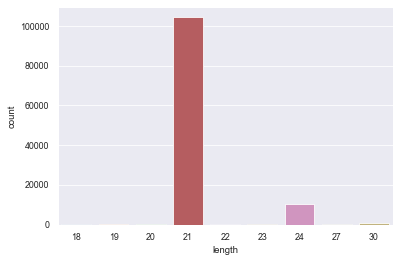

In [125]:
sns.set_theme('paper')
sns.barplot(data=seq_length_df, x='length', y='count')

In [126]:
print(len(insert_seqs))

115746


In [127]:
insert_seqs[0]

Seq('CTGTACCNGCATCATACTGAC')

In [128]:
import numpy as np

In [129]:
insert_seqs_array = np.asarray(insert_seqs, dtype=object)
unique_seqs = np.unique(insert_seqs_array)
len(unique_seqs)

2759

In [130]:
unique_seqs_dict = {}
for seq in unique_seqs:
    unique_seqs_dict[str(seq)] = insert_seqs.count(seq)
    
print(len(unique_seqs_dict))

2759


In [131]:
unique_seqs_sorted = sorted(unique_seqs_dict.items(), key=lambda x: x[1], reverse=True)
unique_seqs_sorted

[('GACGTTAAACCGTACTCTATG', 7006),
 ('TACCATCATGACCATCCGATC', 6281),
 ('GACTCTGTTCGTGCTCAGAAA', 6016),
 ('ATCTTCCGTGACTCTCGTGTT', 5677),
 ('AAAGTTCGTGCTCCGAACATC', 5498),
 ('ACTAAATCTCAGATGACTGTT', 5005),
 ('CCGGGTAAAATGCAGGGTAAA', 4944),
 ('GGTGGTAACGACGCTTACATC', 4334),
 ('ATGCAGAAAGACCAGCTGAAAAAA', 3680),
 ('ATGGGTCGTCCGGCTCAGCAT', 3380),
 ('CTGTACCTGCATCATACTGAC', 2827),
 ('GTTGTTGCTGACGGTGGTCGT', 2813),
 ('CGTGGTCCGAAAGAAATCGCT', 2774),
 ('CAGGGTCATGTTCAGCAGCAG', 2755),
 ('GTTCGTGTTCAGGGTCAGCATATC', 2366),
 ('AAATTCGTTGTTAAAGCTCAG', 2339),
 ('CGTCGTGAACAGATGCTGGGT', 2117),
 ('TCTGAAATGCCGACTGGTTTC', 2011),
 ('AAAGCTCAGGTTTCTAAACCG', 1953),
 ('AAAATCAAAGGTTTCGTTGGTGAC', 1878),
 ('AAAGCTGCTATCGGTAACGAC', 1626),
 ('TCTGCTAAAAAAGTTGACACT', 1555),
 ('CCGCAGTACGCTCAGATCTCT', 1503),
 ('ATGTCTCAGAAAACTTACGTT', 1477),
 ('ATGGAAGCTGACGGTACTTTC', 1381),
 ('CATCATACTTCTACTACTCTG', 1362),
 ('GTTGACGGTAAACAGCGTTAC', 1315),
 ('ACTACTACTCCGGCTCGTGGT', 1305),
 ('TACCATTCTATGACTATGGAC', 1205),
 ('AA

In [132]:
!pip3 install umi_tools

## Practice UMIClusterer class "functor"

In [133]:
from umi_tools import UMIClusterer
clusterer = UMIClusterer(cluster_method="directional")

In [134]:
print()

In [135]:
for seq in unique_seqs_sorted[0:4]:
    print(seq[0])
    print(seq[1])

GACGTTAAACCGTACTCTATG
7006
TACCATCATGACCATCCGATC
6281
GACTCTGTTCGTGCTCAGAAA
6016
ATCTTCCGTGACTCTCGTGTT
5677


In [136]:
umis = {b"GACGTTAAACCGTACTCTATG": 7006,
        b"GACGTTAAACCGTACTCTATA": 3000,
        b"GACTCTGTTCGTGCTCAGAAA": 3000,
        b"ATCTTCCGTAAAACTCGTGGG": 3000,
        b"GGGGGGCGTAAAACTCGTGGG": 1000
}
print(umis, '\n')

clustered_umis = clusterer(umis, threshold=2)
print(clustered_umis)

{b'GACGTTAAACCGTACTCTATG': 7006, b'GACGTTAAACCGTACTCTATA': 3000, b'GACTCTGTTCGTGCTCAGAAA': 3000, b'ATCTTCCGTAAAACTCGTGGG': 3000, b'GGGGGGCGTAAAACTCGTGGG': 1000} 

[[b'GACGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATA'], [b'GACTCTGTTCGTGCTCAGAAA'], [b'ATCTTCCGTAAAACTCGTGGG'], [b'GGGGGGCGTAAAACTCGTGGG']]


In [137]:
clustered_umis = clusterer(umis, threshold=2)
print(clustered_umis)

[[b'GACGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATA'], [b'GACTCTGTTCGTGCTCAGAAA'], [b'ATCTTCCGTAAAACTCGTGGG'], [b'GGGGGGCGTAAAACTCGTGGG']]


In [138]:
umis2 = {b"ATAT": 10,
        b"GTAT": 5,
        b"CCAT": 3}

In [139]:
clustered_umis2 = clusterer(umis2, threshold=1)
print(clustered_umis2)

[[b'ATAT', b'GTAT'], [b'CCAT']]


In [140]:
umis3 = {b"ATAT": 10,
        b"GTAT": 5,
        b"CCAT": 3}

clustered_umis3 = clusterer(umis3, threshold=1)
print(clustered_umis3)

[[b'ATAT', b'GTAT'], [b'CCAT']]


In [141]:
len('GACGTTAAACCGTACTCTATG')

21

# Cluster 21 nucleotide sequences that differ by 1-Hamming distance

Note: The UMIClusterer class only clusters sequences of equal length and 21 nt is, by far, the most frequent seq length. Therefore, only 21 nt seqs are evaluated here. Other length seqs can easily be evaluated with the same logic.

In [142]:
unique_umis = {}
for seq in unique_seqs_sorted:
    if len(seq[0]) == 21:
        seq_bytes = str.encode(seq[0])
        unique_umis[seq_bytes] = seq[1]
len(unique_umis)

2485

In [143]:
clustered_unique_umis = clusterer(unique_umis, threshold=1)
print(len(clustered_unique_umis))

860


In [144]:
for cluster in clustered_unique_umis:
    print(len(cluster))
    print(cluster)

98
[b'GACGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATT', b'GACGTTACACCGTACTCTATG', b'GACGTTAAACCGTACGCTATG', b'GACGATAAACCGTACTCTATG', b'GACGTTAAACCGTACTCTATA', b'GACGTTAAACAGTACTCTATG', b'GACGTTAAACCATACTCTATG', b'GACGTTAAACCGTACTATATG', b'GACGTTAAACCGGACTCTATG', b'GACGTTAAACCGTACTCTGTG', b'GACGTTAAAACGTACTCTATG', b'GCCGTTAAACCGTACTCTATG', b'GATGTTAAACCGTACTCTATG', b'GACGTTAAACTGTACTCTATG', b'GACGTTAAACCGTACTCTATC', b'GACGTTAAACCGTACTCTACG', b'GACGTTAAACCGTGCTCTATG', b'GACGTGAAACCGTACTCTATG', b'GACGTTAAACCGCACTCTATG', b'GACGTTAAACCGAACTCTATG', b'GACGTTAAACCTTACTCTATG', b'GACGTTCAACCGTACTCTATG', b'GACTTTAAACCGTACTCTATG', b'GACGTTAAACCGTACACTATG', b'GACGTTAAACCGTACTCTAGG', b'GACGTTAAACCGTACTCGATT', b'GACGTTAAACCGTACTCAATG', b'GACGTTAAACCGTACCCTATG', b'GACGTTAAACCGTCCTCTATG', b'GACGTTAAACCGTACTCTTTG', b'GACGTTAAACCGAACGCTATG', b'GACGTTAGACCGTACTCTATG', b'GACGATAAACCGCACTCTATG', b'GTCGTTAAACCGTACTCTATG', b'GACGTTAAACCGTACGCTATT', b'GACGGTAAACCGTACTCTATG', b'AACGTTAAACCGTACTCTATG', b'GACGTT

[b'AAAAAAATCATGCGTGACGAA', b'AAAAAAATCATGCGTGAAGAA', b'AAAACAATCATGCGTGACGAA', b'AAAAAAATCATACGTGACGAA', b'AAAACAATCATGCGTGACGCA', b'AAAAAACTCATGCGTGACGAA', b'AAAAAAATCATGTGTGACGAA', b'AAAAAAATCATTCGGGACGAA', b'AAAAAAATCATGCGTGACTAA', b'AAAAAAATCATGCGTGATGAA', b'AAAAAGATCATGCGTGACGAA', b'AAAGAAATCATGCGGGACGAA', b'AAAAAAATCATCCGTGACGAA', b'AAAAAAATCCTGCGTGACGAA', b'AAAAAAATCATGCGGGACGAA', b'AAAAAAATCAAGCGTGACGAA', b'AAAATAATCATGCGTGAAGAA']
10
[b'TCTAAAGCTTCTCAGCAGACT', b'TCTAAAGCTTCCCAGCAGACT', b'TCTAAAGCTTCTCAGCAGACG', b'TCTAAAGCTTCTCAGTAGACT', b'TCTAAAGCTTCTCAGCAGATT', b'TCTAAAGCTTCGCAGCAGACT', b'TCTAAAGCTTCTCAGCATACT', b'TCTAAAGATTCTCAGCAGACT', b'TCCAAAGCTTCTCAGCAGACT', b'TATAAAGCTTCTCAGCAGACT']
12
[b'CGTCTGATGCCGAACCCGAAA', b'CGCCTGATGCCGAACCCGAAA', b'CGTCTGATGCCGAACCCGAAT', b'CGTCTGATGCCGAACCCTAAA', b'AGTCTGATGCAGAACCCGAAA', b'CGTCTGATACCGAACCCGAAA', b'CGTCTGATGCTGAACCCGAAA', b'CGTCTTATGCCGAACCCGAAT', b'CGTCTGATGCCGAACCCGTAA', b'CGTCTGATGCCGAACCCGGAA', b'CGTCTGATGCAGAACCCGAAA', b'C

1
[b'CGTAGTGAAGAGATGGTGGGT']
1
[b'CGTCCGATGCCGAACGCGAAA']
1
[b'CGTCGTAACCTGATGCGGGGT']
1
[b'CGTCGTGAACAGATGATCAGT']
1
[b'CGTCGTGAACAGATTCTTGCT']
1
[b'CGTCGTGAACAGGTGCTGTTT']
1
[b'CGTCGTGAAGCGATGCTGGGT']
1
[b'CGTCTGATGTCTAACCCGAAT']
1
[b'CGTCTTGTTGCTAACCCGTAA']
1
[b'CGTGACCCGAAAGTAATCGCT']
1
[b'CGTGATCCGGAAGAAATTTCT']
1
[b'CGTGGCCCGAGAGAAATCACT']
1
[b'CGTGGTCAGAAAGGTGTTGAA']
1
[b'CGTGGTCCAAAAGCAATCGCT']
1
[b'CGTGGTCCGAAAGAAATTCCG']
1
[b'CGTGGTCCGTCAGTAATCGCT']
1
[b'CGTGGTGATTCGTCGCACGGT']
1
[b'CGTGGTTAACAGATTCTGGTT']
1
[b'CGTGGTTCGAAAGAAATCGAT']
1
[b'CGTGTGCCGCAAGAAATCGCT']
1
[b'CGTTCTAACGCCGCTTACATG']
1
[b'CGTTGTCAGACAGAAATAGCT']
1
[b'CGTTGTGAGCAGATTGTGGGG']
1
[b'CTATACCTGGATCAGACTGTC']
1
[b'CTCGTCCGTTACTCTCGTGTT']
1
[b'CTCTTCCGTGACCCTCGTCTT']
1
[b'CTGAACCCGCATCATACTGAC']
1
[b'CTGCACCTTCACCATACTGAG']
1
[b'CTGCAGGACGCCGAGCTCGCC']
1
[b'CTGCAGGTCGAAGGTTCTTCT']
1
[b'CTGGAAACTACCCGGGCCCAC']
1
[b'CTGGACCTGCCTCAGACTGAC']
1
[b'CTGGACCTTCATCATACTAAC']
1
[b'CTGGCTGGTGCCGAGAACTTC']
1
[b'CTGGGCAAA

[b'TCTGAAAAGCACACTGGCTTC']
1
[b'TCTGAAACTACGAACCGGATC']
1
[b'TCTGAAACTACGACTCGTTTC']
1
[b'TCTGAAATGATGCCGGGTATC']
1
[b'TCTGAAATGCTGACGGGTTAC']
1
[b'TCTGAAGGTCTGGCTAACTTC']
1
[b'TCTGACATTCCGCCTGGTTTC']
1
[b'TCTGATAAAAAAGTTGACAAT']
1
[b'TCTGCAATGCCGCATAATTTA']
1
[b'TCTGCTAAAAAAGATACTATG']
1
[b'TCTGCTAAAAAAGTTTACTCT']
1
[b'TCTGCTAAACAAGACTACACT']
1
[b'TCTGTAATGCCGACAGGTTTC']
1
[b'TCTGTTCAGGCTAATGTTCGT']
1
[b'TCTTACAAACTGTCCTCCATG']
1
[b'TCTTGCCAGATCAAAGAACGT']
1
[b'TCTTTCCAGTTGAATGAACGT']
1
[b'TCTTTCCCGTTCAATGAACGT']
1
[b'TCTTTCCGCCATGCCTCTGGT']
1
[b'TGCGGTCACGACCCTTAGATC']
1
[b'TGCTATTTCTCCTTCCAGGCT']
1
[b'TTCACTCAGCGGGGTCAGGCT']
1
[b'TTCCAGCCGCATTCTCATTCT']
1
[b'TTCCTTCGTGAGACTATTGTT']
1
[b'TTCGACTACTACTTCCAGGCT']
1
[b'TTCTACTACTACTTCACGGCT']
1
[b'TTCTACTCCTACTTTCAGGCT']
1
[b'TTCTCTCTCTACTCCCAGGCT']
1
[b'TTCTTCCGTGACTCTCGTTGT']
1
[b'TTGCATCAGGTCCATCCGATC']
1
[b'TTGGCAACTGACGGTACTTTT']
1
[b'TTGGGTTAAATGCAGGGTAAA']
1
[b'TTTCCGGGTTCTCATCACCAC']
1
[b'TTTGATCTGTCGACTGGTTTC']
1
[b'TTTGATGTACC

In [145]:
# new counts based on 1-Hamming distance clustering

clustered_seq_counts = {}
for cluster in clustered_unique_umis:
    clustered_seq_counts[cluster[0].decode()] = 0
    for seq in cluster:
        clustered_seq_counts[cluster[0].decode()] += unique_seqs_dict[seq.decode()]
        
clustered_seq_counts

{'GACGTTAAACCGTACTCTATG': 7219,
 'TACCATCATGACCATCCGATC': 6399,
 'GACTCTGTTCGTGCTCAGAAA': 6195,
 'ATCTTCCGTGACTCTCGTGTT': 5846,
 'AAAGTTCGTGCTCCGAACATC': 5635,
 'ACTAAATCTCAGATGACTGTT': 5143,
 'CCGGGTAAAATGCAGGGTAAA': 5106,
 'GGTGGTAACGACGCTTACATC': 4440,
 'ATGGGTCGTCCGGCTCAGCAT': 3473,
 'CTGTACCTGCATCATACTGAC': 2916,
 'GTTGTTGCTGACGGTGGTCGT': 2875,
 'CGTGGTCCGAAAGAAATCGCT': 2858,
 'CAGGGTCATGTTCAGCAGCAG': 2839,
 'AAATTCGTTGTTAAAGCTCAG': 2407,
 'CGTCGTGAACAGATGCTGGGT': 2186,
 'TCTGAAATGCCGACTGGTTTC': 2058,
 'AAAGCTCAGGTTTCTAAACCG': 2021,
 'AAAGCTGCTATCGGTAACGAC': 1663,
 'TCTGCTAAAAAAGTTGACACT': 1589,
 'CCGCAGTACGCTCAGATCTCT': 1546,
 'ATGTCTCAGAAAACTTACGTT': 1523,
 'ATGGAAGCTGACGGTACTTTC': 1414,
 'CATCATACTTCTACTACTCTG': 1434,
 'GTTGACGGTAAACAGCGTTAC': 1348,
 'ACTACTACTCCGGCTCGTGGT': 1342,
 'TACCATTCTATGACTATGGAC': 1450,
 'AACAAAGTTAACGTTGTTAAA': 1086,
 'GAAGAAGTTATGAAACGTTAC': 1015,
 'CAGTCTCAGATGCGTAACACT': 949,
 'TCTCGTCATATGCCGGCTACT': 783,
 'TCTCAGGACCGTCCGCAGAAA': 772,
 'AAAACTGTT

# Cluster 21 nucleotide sequences that differ by 2-Hamming distance

In [146]:
clustered_unique_umis2 = clusterer(unique_umis, threshold=2)
print(len(clustered_unique_umis2))

545


In [147]:
# new counts based on 1-Hamming distance clustering

clustered_seq_counts2 = {}
for cluster in clustered_unique_umis2:
    clustered_seq_counts2[cluster[0].decode()] = 0
    for seq in cluster:
        clustered_seq_counts2[cluster[0].decode()] += unique_seqs_dict[seq.decode()]
        
clustered_seq_counts2

{'GACGTTAAACCGTACTCTATG': 7245,
 'TACCATCATGACCATCCGATC': 6413,
 'GACTCTGTTCGTGCTCAGAAA': 6207,
 'ATCTTCCGTGACTCTCGTGTT': 5862,
 'AAAGTTCGTGCTCCGAACATC': 5648,
 'ACTAAATCTCAGATGACTGTT': 5151,
 'CCGGGTAAAATGCAGGGTAAA': 5121,
 'GGTGGTAACGACGCTTACATC': 4453,
 'ATGGGTCGTCCGGCTCAGCAT': 3486,
 'CTGTACCTGCATCATACTGAC': 2926,
 'GTTGTTGCTGACGGTGGTCGT': 2880,
 'CGTGGTCCGAAAGAAATCGCT': 2869,
 'CAGGGTCATGTTCAGCAGCAG': 2843,
 'AAATTCGTTGTTAAAGCTCAG': 2410,
 'CGTCGTGAACAGATGCTGGGT': 2192,
 'TCTGAAATGCCGACTGGTTTC': 2065,
 'AAAGCTCAGGTTTCTAAACCG': 2026,
 'AAAGCTGCTATCGGTAACGAC': 1668,
 'TCTGCTAAAAAAGTTGACACT': 1596,
 'CCGCAGTACGCTCAGATCTCT': 1552,
 'ATGTCTCAGAAAACTTACGTT': 1527,
 'ATGGAAGCTGACGGTACTTTC': 1420,
 'CATCATACTTCTACTACTCTG': 1436,
 'GTTGACGGTAAACAGCGTTAC': 1349,
 'ACTACTACTCCGGCTCGTGGT': 1345,
 'TACCATTCTATGACTATGGAC': 1463,
 'AACAAAGTTAACGTTGTTAAA': 1089,
 'GAAGAAGTTATGAAACGTTAC': 1019,
 'CAGTCTCAGATGCGTAACACT': 952,
 'TCTCGTCATATGCCGGCTACT': 787,
 'TCTCAGGACCGTCCGCAGAAA': 775,
 'AAAACTGTT

In [148]:
for seq in clustered_unique_umis[55]:
    print(seq.decode("utf-8"))

GTTCCGGACCAGCGTCCGAAA
GTTCCGGACCAGCGTCCGAAT
ATTCCGGACCAGCGTCCGAAA
GTTCCGAACCAGCGTCCGAAA
GTTCCGGACCAGTGTCCGAAA


# Visualize a UMI cluster graph

### Example: Below is the 55th cluster from the 21 nucleotide insert sequences
### The central node had the highest frequency prior to clustering -- each child node is a sequence with a hamming distance of 1 from the central node.
![](cluster55.png)

# Translate DNA to amino acid sequences for 2000 most abundant peptides

In [149]:
to_translate = unique_seqs_sorted[:2000]

In [150]:
from Bio.Seq import Seq

In [151]:
peptides = []
for seq in to_translate:
    dna = Seq(seq[0])
    rna = dna.transcribe()
    peptide = rna.translate()
    peptides.append(str(peptide))
#     print(dna)
#     print(rna)
#     print(peptide)
    

/Users/jonathanlifferth/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [152]:
peptides

['DVKPYSM',
 'YHHDHPI',
 'DSVRAQK',
 'IFRDSRV',
 'KVRAPNI',
 'TKSQMTV',
 'PGKMQGK',
 'GGNDAYI',
 'MQKDQLKK',
 'MGRPAQH',
 'LYLHHTD',
 'VVADGGR',
 'RGPKEIA',
 'QGHVQQQ',
 'VRVQGQHI',
 'KFVVKAQ',
 'RREQMLG',
 'SEMPTGF',
 'KAQVSKP',
 'KIKGFVGD',
 'KAAIGND',
 'SAKKVDT',
 'PQYAQIS',
 'MSQKTYV',
 'MEADGTF',
 'HHTSTTL',
 'VDGKQRY',
 'TTTPARG',
 'YHSMTMD',
 'NKVNVVK',
 'EEVMKRY',
 'QSQMRNT',
 'SRHMPAT',
 'SQDRPQK',
 'KTVVTGV',
 'ASGAGKQS',
 'SFQFKER',
 'KQPHSQS',
 'IKPLEIK',
 'VVSRGAV',
 'VEPQGPR',
 'VIKPTGK',
 'KDYPRGD',
 'FYFYFQA',
 'YVGVLRG',
 'KKIMRDE',
 'SKASQQT',
 'RLMPNPK',
 'KSAGVTL',
 'HNKVQAM',
 'IGMSQPA',
 'SKGVIHQDKD',
 'KVSPERKL',
 'PDSGVRV',
 'HHEHHVL',
 'SFRHDSG',
 'AVKGLTQGMT',
 'QQKQIDK',
 'KVVPNGQK',
 'AYREGRH',
 'VDTKNKL',
 'VSGIKFN',
 'PNFIQVR',
 'VPDQRPK',
 'YHSMTMG',
 'GMMSFEH',
 'ANIKNPIR',
 'QIDKSRS',
 'EIRATTKI',
 'MGTVKQE',
 'MTQRGQA',
 'LRQLVMH',
 'ENMVQRH',
 'RVGSIKQ',
 'MYQREKS',
 'RVGSSDV',
 'YNSPVVP',
 'YALGSDDS',
 'QVGHQNI',
 'HDHVSRG',
 'GKKEIAS',
 'SSTIAQ',
 '

## Compute:
<ul>
<li>i. Frequency in samples
<li>ii. Average frequency across samples
<li>iii. Enrichment score, dividing frequency in tissue sample by frequency
in input library
<li>iv. Report your results on a heatmap (bonus)
<ul>

## Frequency in samples
### (Liver cDNA only)

In [153]:
import os
import time
from datetime import datetime

In [154]:
%%script echo skipping

for input_file in paths:
    encoding = guess_type(input_file)[1]  # uses file extension
    _open = partial(gzip.open, mode='rt') if encoding == 'gzip' else open

    read_count = 0
    with _open(input_file) as f:
        for record in SeqIO.parse(f, 'fastq'):
            read_count += 1
    print(now)
    print(read_count)

skipping


In [155]:
all_seqs = {}
seq_dict_of_dicts = {}


def map_nucs(seq):
    mapped_seq = []
    for nuc in seq:
        if nuc == 'A':
            mapped_seq.append(1)
        elif nuc == 'T':
            mapped_seq.append(2)
        elif nuc == 'G':
            mapped_seq.append(3)
        elif nuc == 'C':
            mapped_seq.append(4)
    return mapped_seq


def pad(x, _max_len):
    return x + [0] * (_max_len - len(x))


def unmap_nucs(seq):
    # unmap [int] to str
    unmapped_seq = ''
    for nuc in seq:
        if nuc == 1:
            unmapped_seq += 'A'
        elif nuc == 2:
            unmapped_seq += 'T'
        elif nuc == 3:
            unmapped_seq += 'G'
        elif nuc == 4:
            unmapped_seq += 'C'
        elif nuc == 0:
            pass
    return unmapped_seq


def get_unique_seqs(filepath):
    start = datetime.now()
    
    encoding = guess_type(filepath)[1]  # uses file extension
    _open = partial(gzip.open, mode='rt') if encoding == 'gzip' else open
    
    Left_flank = 'taacttgcagcagcaaGGC' 
    Right_flank = 'GCCaacacggctcctcaaa'

    Left_flank = Left_flank.upper()
    Right_flank = Right_flank.upper()
    
    # extract insert seqs from fastq file
    insert_seqs = []
    with _open(filepath) as f:
        for record in SeqIO.parse(f, 'fastq'):
            if Left_flank in record.seq and Right_flank in record.seq:
                seq_start = record.seq.find(Left_flank) + len(Left_flank)
                seq_end = record.seq.find(Right_flank)
                seq = record.seq[seq_start:seq_end]
                insert_seqs.append(str(seq))
    print('# of insert_seqs: ', len(insert_seqs))
    
    # map insert to ints for faster processing
    insert_seqs = [map_nucs(x) for x in insert_seqs]
    
    _max_len = len(max(insert_seqs, key=len))
    
    # pad mapped seq values for matrix
    padded_insert_seqs = [pad(x, _max_len) for x in insert_seqs]
    
    # convert padded seqs to np matrix
    insert_matrix = np.asarray(padded_insert_seqs)
    
    # isolate unique seqs and seq counts
    unique_seqs, counts = np.unique(insert_matrix, axis=0, return_counts=True)
    
    print('# of unique_seqs: ', len(unique_seqs))
    
    # unmap int values back to str
    unmapped_unique_seqs = [unmap_nucs(x) for x in unique_seqs]
    
    # create dict with unique seqs and counts
    unique_seqs_dict = {unmapped_unique_seqs[i]:counts[i] for i in range(len(unmapped_unique_seqs))}
    
    # sort dict by descending count values
    unique_seqs_sorted = sorted(unique_seqs_dict.items(), key=lambda x: x[1], reverse=True)
    
    end = datetime.now()
    elapsed = end - start
    print('elapsed time: ', elapsed)
    
    return unique_seqs_sorted

In [156]:
# create list with all liver sample paths
target_dir = '/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA'

paths = []
for root, dirs, files in os.walk(target_dir):
    for file in files:
        if file.endswith('fastq.gz'):
            paths.append(os.path.join(root,file))            
paths.sort()
paths

for path in paths:
    key = path.split('/')[-1][:4]
    print(key)

1017
1027
1032
1153
1163
1168


In [157]:
liver_1017 = paths[0]
liver_1027 = paths[1]
liver_1032 = paths[2]
liver_1153 = paths[3]
liver_1163 = paths[4]
liver_1168 = paths[5]

In [158]:
loop_start = datetime.now()

dict1017 = get_unique_seqs(liver_1017)
dict1027 = get_unique_seqs(liver_1027)
dict1032 = get_unique_seqs(liver_1032)
dict1153 = get_unique_seqs(liver_1153)
dict1163 = get_unique_seqs(liver_1163)
dict1168 = get_unique_seqs(liver_1168)

elapsed = datetime.now() - loop_start
print('Total elapsed: ', elapsed)

# of insert_seqs:  277729
# of unique_seqs:  12092
elapsed time:  0:00:21.288018
# of insert_seqs:  289511
# of unique_seqs:  14560
elapsed time:  0:00:18.297411
# of insert_seqs:  330812
# of unique_seqs:  11134
elapsed time:  0:00:20.563239
# of insert_seqs:  115746
# of unique_seqs:  2758
elapsed time:  0:00:07.250692
# of insert_seqs:  112504
# of unique_seqs:  2661
elapsed time:  0:00:07.166580
# of insert_seqs:  111294
# of unique_seqs:  2505
elapsed time:  0:00:07.567121
Total elapsed:  0:01:22.460236


In [159]:
len(dict1017)

12092

In [164]:
dict1017[0]

('GTTGTTGTTCCGCGTATGGCT', 1757)

In [171]:
# slice each tissue sample to look only at the top 10 most common seqs
top1017 = dict1017[:10]
top1027 = dict1027[:10]
top1032 = dict1032[:10]
top1153 = dict1153[:10]
top1163 = dict1163[:10]
top1168 = dict1168[:10]
top_list = [top1017, top1027, top1032, top1153, top1163, top1168]

In [173]:
# combine all top seqs into single dict for comparison
top_all = {}
for sample in top_list:
    for seq in sample:
        if seq[0] not in top_all:
            top_all[seq[0]] = seq[1]
        elif seq[0] in top_all:
            top_all[seq[0]] += seq[1]
len(top_all)

60

In [201]:
# define frequency calc function 

def calc_freq(top_tuple, ref_tuple):
    # key: sequence, value: frequency
    dict_out = {}
    total_seqs = sum([x[1] for x in ref_tuple])
    total_unique_seqs = len(ref_tuple)
    for seq in top_tuple:
        dict_out[seq[0]] = seq[1] / total_seqs
    print(total_seqs, total_unique_seqs)
    return dict_out


In [205]:
# create frequency dicts

freq1017 = calc_freq(top1017, dict1017)
freq1027 = calc_freq(top1027, dict1027)
freq1032 = calc_freq(top1032, dict1032)
freq1153 = calc_freq(top1153, dict1153)
freq1163 = calc_freq(top1163, dict1163)
freq1168 = calc_freq(top1168, dict1168) 

freq1168

277729 12092
289511 14560
330812 11134
115746 2758
112504 2661
111294 2505


{'TACGACATCGGTGCTCATATC': 0.1030513774327457,
 'ATCGACGGTCAGAAAAAATAC': 0.0722950024260068,
 'ATGAACCAGCGTACTGCTGTT': 0.06633780796808453,
 'TACGTTCAGACTAAAGGTGCT': 0.06356137797185832,
 'GACACTTCTGCTATCGTTTCT': 0.05923949179650296,
 'GCTAAACAGGCTCCGCAGAAA': 0.053947202904019984,
 'ATCACTCAGGCTGAAAAACGTATC': 0.042706704763958526,
 'GAACAGAACCGTGCTGAACAG': 0.04209571046058188,
 'TTCTCTAACATGGGTCGTCAG': 0.029480475137922978,
 'GACCATATCCTGAAACTGGGT': 0.027782270382949666}

### I spent some time trying to speed up the analysis using Julia but wasn't quite able to figure it out.

In [160]:
!pip install julia

In [161]:
from julia.api import Julia
jl = Julia(compiled_modules=False)

In [162]:
%load_ext julia.magic

The julia.magic extension is already loaded. To reload it, use:
  %reload_ext julia.magic


In [163]:
%time
# compare python vs julia for IO
start_py = datetime.now()

input_file = '/Users/jonathanlifferth/data/bioinformatics/Divergene/question2/liver cDNA/1153-cDNA-8V8_S30_L001_R1_001.fastq.gz'

encoding = guess_type(input_file)[1]  # uses file extension
_open = partial(gzip.open, mode='rt') if encoding == 'gzip' else open

read_count = 0
with _open(input_file) as f:
    for record in SeqIO.parse(f, 'fastq'):
        read_count += 1

elapsed = datetime.now() - start_py
print(read_count)
print('Elapsed: ', elapsed)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.87 µs
173019
Elapsed:  0:00:03.803177
